In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# I. Sampling a distribution

### Transform the original set of samples

The target distribution we want to get is $\mathcal{N}(\begin{bmatrix}0.3 \\ 0  \end{bmatrix}, \begin{bmatrix}0.02 & -0.025 \\ -0.025 & 0.035  \end{bmatrix})$

We will start by sampling the simple distribution $\mathcal{N}(\begin{bmatrix}0 \\ 0  \end{bmatrix}, \begin{bmatrix}1 & 0 \\ 0 & 1  \end{bmatrix})$

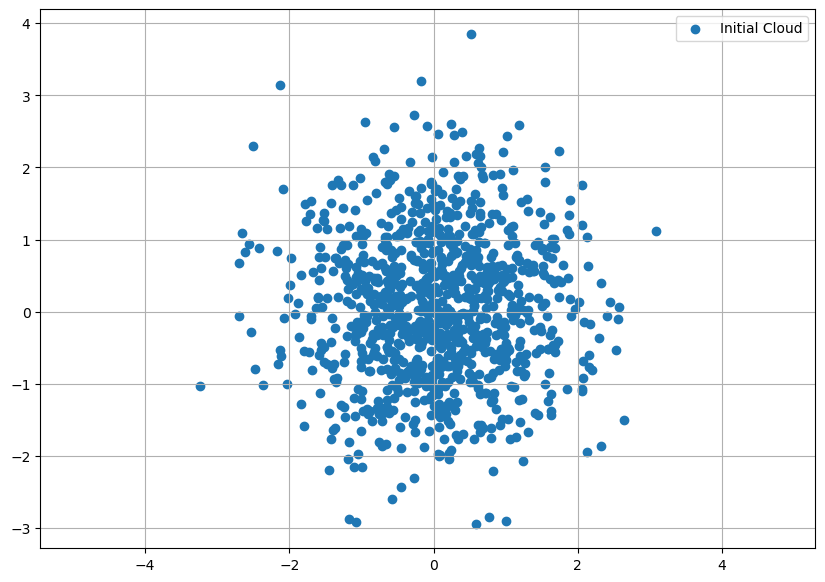

In [2]:
# number of samples
n = 1000

original_cloud = np.random.randn(n,2)

# plotting the initial cloud
plt.figure(figsize=(10,7))
plt.scatter(original_cloud[:,0], original_cloud[:,1],label='Initial Cloud')
plt.axis('equal')
plt.legend()
plt.grid()

In [12]:
def linear_transformation(pts: np.ndarray, A: np.ndarray, b: np.ndarray) -> np.ndarray:
    """linear_transformation performs linear transformation for given points

    Args:
        pts (np.ndarray): array of points with shape (n, 2)
        A (np.ndarray): matrix of linear transformation with shape (2, 2)
        b (np.ndarray): vector of biases with shape (2,)

    Returns:
        np.ndarray: transformed points
    """
    ### your code in here
    # ...
    return (A @ pts.T + b).T

Find the transformation that produces samples as in the target distribution defined above.

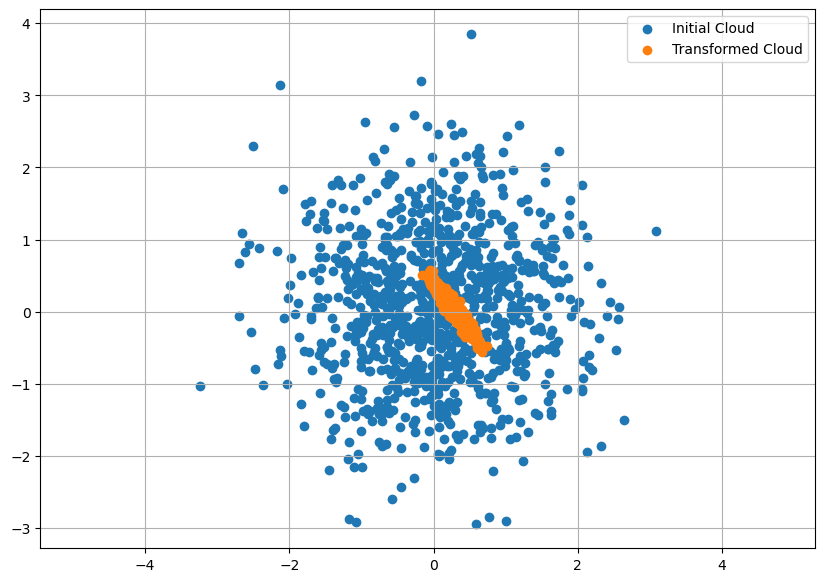

In [13]:
mean = np.array([
    [0.3],
    [0]
])

cov = np.array([[0.02,-0.025],
                [-0.025,0.035]])

L = np.linalg.cholesky(cov)
cloud = linear_transformation(original_cloud, L, mean)

# plotting the two clouds
plt.figure(figsize=(10,7))
plt.scatter(original_cloud[:,0], original_cloud[:,1],label='Initial Cloud')
plt.scatter(cloud[:,0], cloud[:,1],label='Transformed Cloud')
plt.axis('equal')
plt.legend()
plt.grid()

(Optional) Provide an alternative matrix factorization (SVD) and compare the results

[[-0.59693053  0.80229293]
 [ 0.80229293  0.59693053]] [0.05360077 0.00139923]


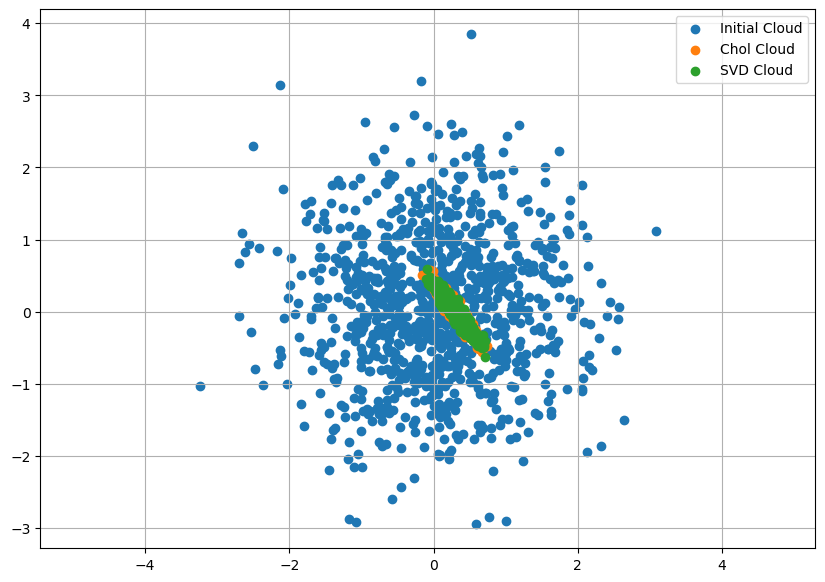

In [14]:
# Your code in here
U,D,V = np.linalg.svd(cov)
print(U,D)
A_ = U @ np.diag(np.sqrt(D))
cloud2 = linear_transformation(original_cloud, A_, mean)

# plotting the two clouds
plt.figure(figsize=(10,7))
plt.scatter(original_cloud[:,0], original_cloud[:,1],label='Initial Cloud')
plt.scatter(cloud[:,0], cloud[:,1],label='Chol Cloud')
plt.scatter(cloud2[:,0], cloud2[:,1],label='SVD Cloud')
plt.axis('equal')
plt.legend()
plt.grid()

## Measure accuracy of transformation

In [15]:
print("mean = ", mean)
print("covariance = \n", cov)

mean =  [[0.3]
 [0. ]]
covariance = 
 [[ 0.02  -0.025]
 [-0.025  0.035]]


### Cholesky

In [16]:
print('Sample mean = ', cloud.mean(axis=0))
print('Sample covariance = ', np.cov(cloud.transpose()), end='\n\n')

print('L2 error for mean = ', np.linalg.norm(mean - cloud.mean(axis=0)))
print('L2 error for covariance = ', np.linalg.norm(cov - np.cov(cloud.transpose())))

Sample mean =  [ 0.30469323 -0.00237711]
Sample covariance =  [[ 0.01849362 -0.02309518]
 [-0.02309518  0.03270471]]

L2 error for mean =  0.4292989124831651
L2 error for covariance =  0.0038463220521758055


### SVD

In [17]:
print('Sample mean = ', cloud2.mean(axis=0) )
print('Sample covariance = ', np.cov(cloud2.transpose()), end='\n\n')

print('L2 error for mean = ', np.linalg.norm(mean - cloud2.mean(axis=0)))
print('L2 error for covariance = ', np.linalg.norm(cov - np.cov(cloud2.transpose())))

Sample mean =  [0.29712374 0.00743653]
Sample covariance =  [[ 0.01856768 -0.02304008]
 [-0.02304008  0.03243734]]

L2 error for mean =  0.41706051864099364
L2 error for covariance =  0.0040374946335681745


# II. Nonlinear transformations
Now let's apply some non-linear transformation to our `cloud`. Let's consider `exp()` function as non-linear function:

$$
y = exp(x) + c
$$

where $exp(x) := [exp(x_1), exp(x_2)]^T$ and $c$ is a constant vector and:

$$
c = [1,0]^T
$$

**Define the non-linear transformation here:**

In [22]:
# put your code here
c = np.array([[1.0],[0.0]])

def nonlinear_transformation(c: np.ndarray, pts: np.ndarray) -> np.ndarray:
    """nonlinear_transformation coordinates warp function

    Args:
        c (np.ndarray): bias array with shape (2,)
        pts (np.ndarray): 'x' points array with shape (n, 2) 

    Returns:
        np.ndarray: transformed points (exp(x) + c) array with shape (n, 2)
    """
    
    
    return (np.exp(pts.T) + c).T


def jacobian_nonlinear_transformation(pt: np.ndarray) -> np.ndarray:
    """jacobian_nonlinear_transformation computes jacobian for the given point

    Args:
        pt (np.ndarray): points cooridnates array with shape (2,)

    Returns:
        np.ndarray: computed jacobian for nonlinear_transformation in the given point, 
                    array with shape (2,2)
    """
    # For y = exp(x) + c, the Jacobian is a diagonal matrix with exp(x_i) on diagonal
    jacobian = np.zeros((2,2))
    jacobian[0,0] = np.exp(pt[0])
    jacobian[1,1] = np.exp(pt[1])
    return jacobian

**Apply non linear transformation to initial cloud:**

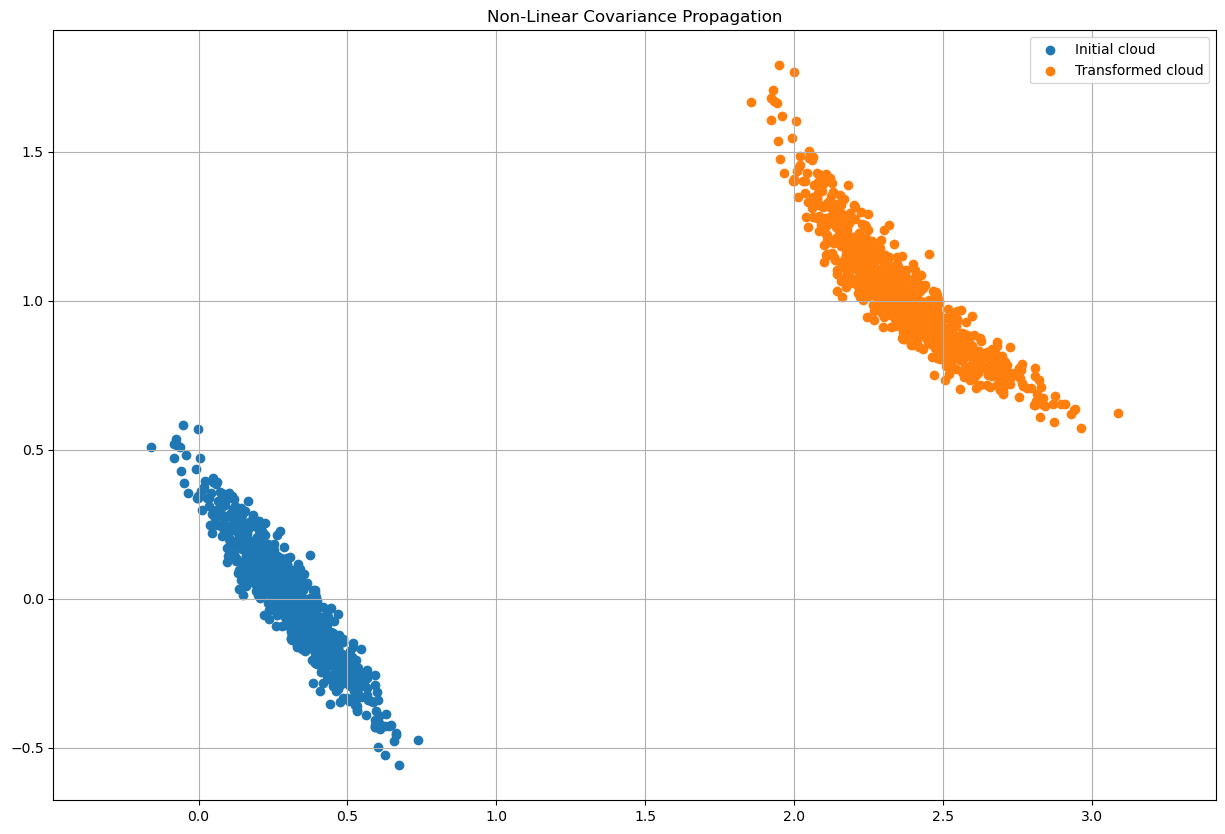

In [23]:
propagated_cloud = nonlinear_transformation(c,cloud)

plt.figure(figsize=(15,10))
plt.title("Non-Linear Covariance Propagation")
plt.scatter(cloud[:,0], cloud[:,1], label='Initial cloud')
plt.scatter(propagated_cloud[:,0],propagated_cloud[:,1], label='Transformed cloud')
plt.legend()
plt.axis('equal')
plt.grid()

For non-linear transformation $f$ to propagate a gaussian the linearization is done:

$$
\hat{\mu} = f(\mu)\\
\hat{\Sigma} = J \Sigma J^T, \text{where $J = \nabla f = \left[\dfrac{df}{dx_i}\right]$ - Jacobian of $f$}.
$$

**Calculating the Jacobian:**

In [27]:
print(mean.shape)
J = jacobian_nonlinear_transformation(mean)
J

(2, 1)


/var/folders/7k/4vb9j3_s13l8qv3m4vdw9m5w0000gn/T/ipykernel_24723/3605425849.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  jacobian[0,0] = np.exp(pt[0])
/var/folders/7k/4vb9j3_s13l8qv3m4vdw9m5w0000gn/T/ipykernel_24723/3605425849.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  jacobian[1,1] = np.exp(pt[1])


array([[1.34985881, 0.        ],
       [0.        , 1.        ]])

**Propagating the mean:**

In [25]:
mu = nonlinear_transformation(c,mean)
mu

array([[2.34985881, 1.34985881],
       [2.        , 1.        ]])

**Propagating the covariance:**

In [26]:
sigma = J@cov@J.transpose()
sigma

array([[ 0.03644238, -0.03374647],
       [-0.03374647,  0.035     ]])

**Error for mean:**

In [28]:
np.linalg.norm(propagated_cloud.mean(axis=0) - mu)

0.49928961478314876

**Error for covariance:**

In [29]:
np.linalg.norm(np.cov(propagated_cloud.transpose()) - sigma)

0.0032794474550738007

### Permissible Linearization

In [35]:
def isocontour_points(i: int, mean: np.ndarray, cov: np.ndarray) -> np.ndarray:
    """isocontour_points generates isocontour points for given mean and cov

    Args:
        i (int): isocontour serial number
        mean (np.ndarray): mean, vector  with shape (2,)
        cov (np.ndarray): cov matrix with shape (2, 2)

    Returns:
        np.ndarray: points, array with shape (100, 2)
    """
    angles = np.linspace(0, np.pi*2, 100)
    points = np.hstack([np.cos(angles)[:, None], np.sin(angles)[:, None]]) * float(i)
    
    A = np.linalg.cholesky(cov)
    transformed_points = linear_transformation(points, A, mean)
    
    # # Get eigenvalues and eigenvectors of covariance matrix
    # eigenvals, eigenvecs = np.linalg.eigh(cov)
    
    # # Scale points by square root of eigenvalues
    # scaled_points = points @ np.diag(np.sqrt(eigenvals))
    
    # # Rotate points using eigenvectors
    # rotated_points = scaled_points @ eigenvecs.T
    
    # # Translate points to mean
    # transformed_points = rotated_points + mean
    
    return transformed_points


In [36]:
i=3
cloud_iso = isocontour_points(i=i, mean=cloud.mean(axis=0), cov=np.cov(cloud.transpose()))
propagated_cloud_iso_est = isocontour_points(i=i, mean=propagated_cloud.mean(axis=0), cov=np.cov(propagated_cloud.transpose()))
propagated_cloud_iso = nonlinear_transformation(c=c, pts=cloud_iso)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.scatter(cloud[:, 0], cloud[:, 1], label='cloud')
ax.plot(cloud_iso[:, 0], cloud_iso[:, 1], label=f'{i} cloud isocontour', linewidth=4.0, c='b')

ax.scatter(propagated_cloud[:, 0], propagated_cloud[:, 1], label='cloud')
ax.plot(propagated_cloud_iso[:, 0], propagated_cloud_iso[:, 1], label=f'propagated cloud isocontour', linewidth=4.0, c='chocolate')

ax.plot(propagated_cloud_iso_est[:, 0], propagated_cloud_iso_est[:, 1], label=f'estimated propagated cloud isocontour', linewidth=4.0, c='saddlebrown')

ax.set_aspect('equal')
ax.legend(loc='best')
plt.show()

ValueError: operands could not be broadcast together with shapes (2,100) (2,) 